In [2]:
# import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math

import ipywidgets as widgets
from IPython.display import display

In [3]:
# load the datasets
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

display(species_info)
display(observations)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [4]:
# lets merge the data 

data = species_info.merge(observations, on = 'scientific_name', how = 'inner')

data.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             25632 non-null  category
 1   scientific_name      25632 non-null  object  
 2   common_names         25632 non-null  object  
 3   conservation_status  25632 non-null  category
 4   park_name            25632 non-null  category
 5   observations         25632 non-null  int64   
dtypes: category(3), int64(1), object(2)
memory usage: 676.7+ KB


In [6]:
# lets just fill in the missing values for conservation_status, we can see that its missing value if theres no conversation staus
data.conservation_status = data.conservation_status.fillna("NA")

In [7]:
# how many species do we have 
num_species = data.scientific_name.nunique()
print(f"There's {num_species} unique species in this dataset")

# how many parks we have observations from
num_parks = data.park_name.nunique()
print(f"There's {num_parks} unique parks")

# conversation statuses
statuses = data.conservation_status.unique()
print(f"The conversation statuses {statuses}")

# categories
categories = data.category.unique()
print(f'The categories of animals: {categories}')

There's 5541 unique species in this dataset
There's 4 unique parks
The conversation statuses ['NA' 'Species of Concern' 'Endangered' 'In Recovery' 'Threatened']
The categories of animals: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [11]:
# preprocessing stypes

# convert columns in categories
nominal_vars = ['category', 'conservation_status', 'park_name']

for var in nominal_vars:
    data[var] = data[var].astype('category')


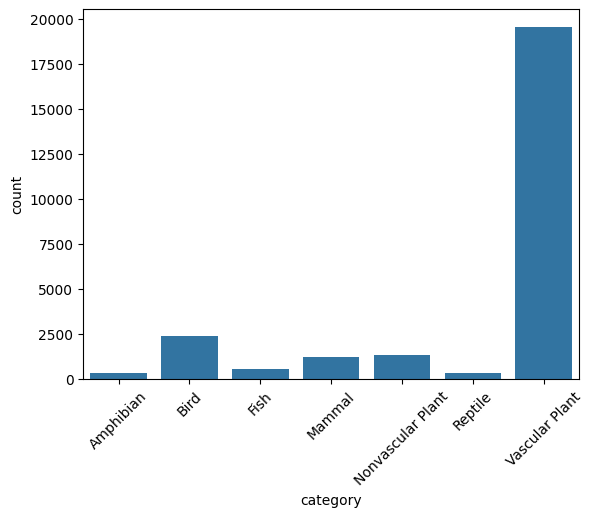

In [12]:
# whats the breakdown of categories
sns.countplot(x = "category", data = data)
plt.xticks(rotation = 45)
plt.show()

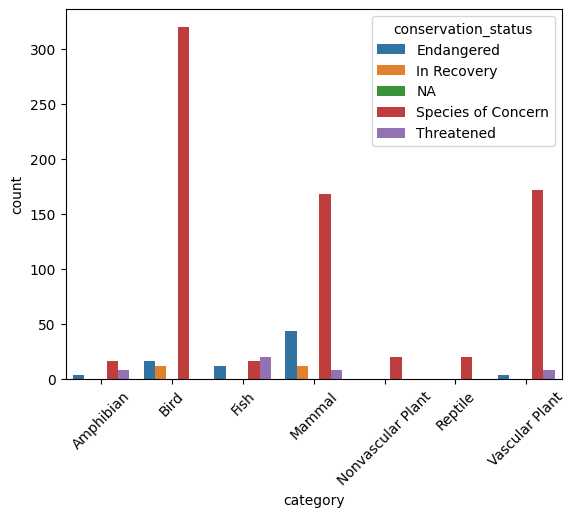

In [13]:
# lets only look at the breakdown of species that have a conservation status
conserved_data = data.query('conservation_status != "NA"')
sns.countplot(x = 'category', hue = 'conservation_status', data = conserved_data)
plt.xticks(rotation = 45)
plt.show()

/Users/julienh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/Library/Python/3.9/lib/py

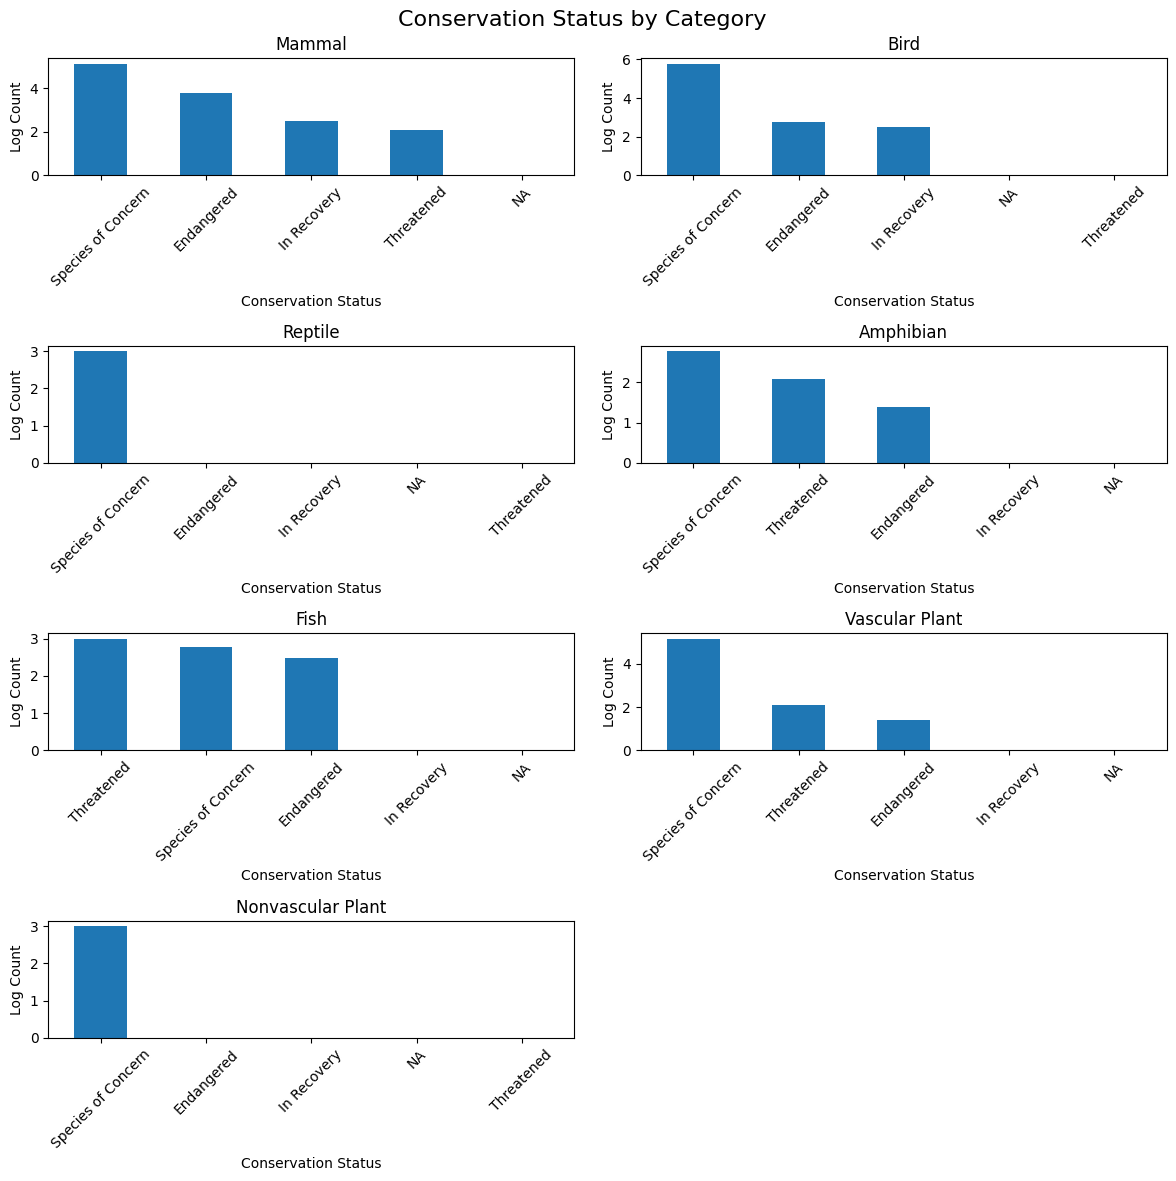

In [14]:
n_categories = len(categories)

n_cols = 2
n_rows = math.ceil(n_categories / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 12))
fig.suptitle("Conservation Status by Category", fontsize = 16)
axes = axes.flatten()

for i, c in enumerate(categories):
    # filter for the cateogires and then show the breakdown
    filtered = conserved_data[conserved_data.category == c]
    # status counts
    status_counts = np.log(filtered['conservation_status'].value_counts())
    
    # create the bar plot
    status_counts.plot(kind = 'bar', ax=axes[i])
    
    # customizing the subplot
    axes[i].set_title(c)
    axes[i].set_xlabel("Conservation Status")
    axes[i].set_ylabel("Log Count")
    axes[i].tick_params(axis = 'x', rotation = 45)
    
# remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

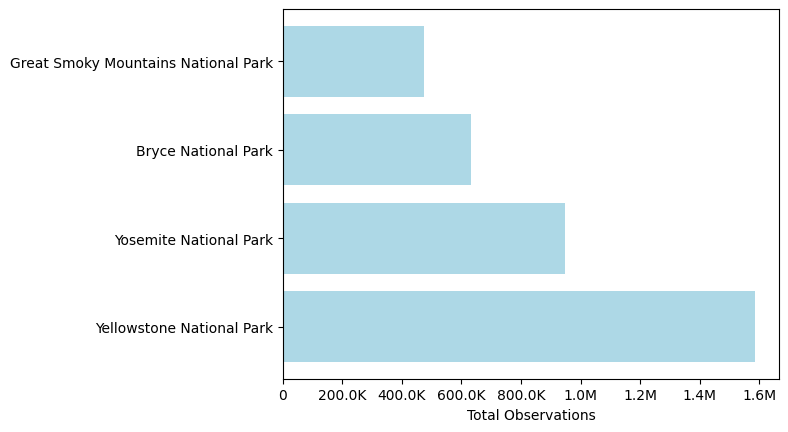

In [19]:
# lets do a breakdown of total observations per park
parks = data.park_name.unique()
obs = []

def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.1f}K'
    else:
        return f'{x:.0f}'

for park in parks:
    # find the total observations
    park_data = data[data['park_name'] == park]
    park_observations = park_data.observations.sum()
    obs.append(park_observations)
    
# lets sort
parks_sorted, obs_sorted = zip(*sorted(zip(parks, obs), key = lambda x: x[1], reverse=True))


plt.barh(parks_sorted, obs_sorted, color = 'lightblue')
plt.xlabel("Total Observations")
# format the x axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

In [34]:
import random

In [41]:
# design a widget
names = data.sample(50).common_names.unique().tolist()



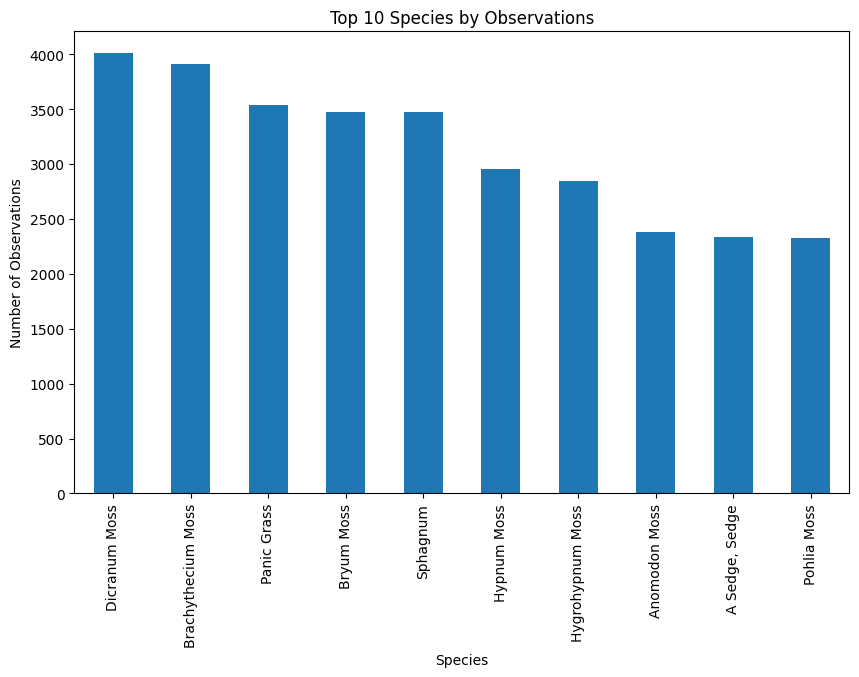

In [15]:
# Top Species by Observations
top_species = data.groupby('common_names')['observations'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_species.plot(kind='bar')
plt.title('Top 10 Species by Observations')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.show()